**Thinkful - 3.5.3 - Challenge - Boosting Models**

In [3]:
import pandas as pd
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


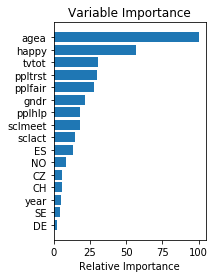

In [4]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**Improve Model**

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

In [5]:
type_I_test = []
type_II_test = []
iteration = []
est_n = []
max_depth = []
loss = []
subsample = []

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]
i = 1
#loss_type = ['deviance','exponential']

start = time.time()

for n in range(1000, 5000, 1000):
    for m in range(1, 5):
        for s in range(2,10,2):
            s2 = s*0.1
            params = {'n_estimators': n,
                      'max_depth': m,
                      'loss': 'deviance',
                      'subsample':s2}

            # Initialize and fit the model.
            clf = ensemble.GradientBoostingClassifier(**params)
            clf.fit(X_train, y_train)

            predict_train = clf.predict(X_train)
            predict_test = clf.predict(X_test)

            # Accuracy tables.
            table_train = pd.crosstab(y_train, predict_train, margins=True)
            table_test = pd.crosstab(y_test, predict_test, margins=True)

            train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
            train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

            test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
            test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

            type_I_test.append(test_tI_errors)
            type_II_test.append(test_tII_errors)
            est_n.append(n)
            max_depth.append(m)
            loss.append('deviance')
            subsample.append(s2)
            iteration.append(i)
            i += 1

stop = time.time()
a = stop - start
print("Run time = ",a)

Run time =  868.6398210525513


In [6]:
# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]
i = 1
#loss_type = ['deviance','exponential']

start = time.time()

for n in range(1000, 5000, 1000):
    for m in range(1, 5):
        for s in range(2,10,2):
            s2 = s*0.1
            params = {'n_estimators': n,
                      'max_depth': m,
                      'loss': 'exponential',
                      'subsample':s2}

            # Initialize and fit the model.
            clf = ensemble.GradientBoostingClassifier(**params)
            clf.fit(X_train, y_train)

            predict_train = clf.predict(X_train)
            predict_test = clf.predict(X_test)

            # Accuracy tables.
            table_train = pd.crosstab(y_train, predict_train, margins=True)
            table_test = pd.crosstab(y_test, predict_test, margins=True)

            train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
            train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

            test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
            test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

            type_I_test.append(test_tI_errors)
            type_II_test.append(test_tII_errors)
            est_n.append(n)
            max_depth.append(m)
            loss.append('exponential')
            subsample.append(s2)
            iteration.append(i)
            i += 1

stop = time.time()
a = stop - start
print("Run time = ",a)

Run time =  804.54736495018


**Reviewing the Results**

After reviewing the data, we can see that the Type I and Type II errors are inversely related.

In [33]:
df2 = pd.DataFrame(type_I_test,columns=['Type I Error'])
df2['Type II Error'] = pd.Series(type_II_test, index=df2.index)
df2['Estimators'] = pd.Series(est_n, index=df2.index)
df2['Max Depth'] = pd.Series(max_depth, index=df2.index)
df2['Loss Type'] = pd.Series(loss, index=df2.index)
df2['Subsample'] = pd.Series(subsample, index=df2.index)
df2['Iteration'] = pd.Series(iteration, index=df2.index)

df2.head()

,Type I Error,Type II Error,Estimators,Max Depth,Loss Type,Subsample,Iteration
0,0.061350,0.204908,1000,1,deviance,0.2,1
1,0.053988,0.207362,1000,1,deviance,0.4,2
2,0.057669,0.206135,1000,1,deviance,0.6,3
3,0.053988,0.208589,1000,1,deviance,0.8,4
4,0.085890,0.175460,1000,2,deviance,0.2,5


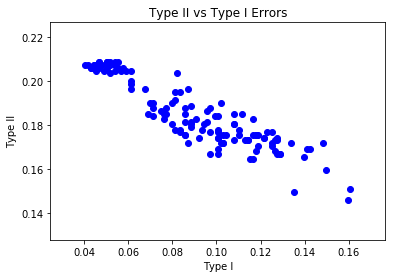

In [34]:
# Look at our data.
plt.scatter(type_I_test,type_II_test,color='blue')
plt.title('Type II vs Type I Errors')
plt.xlabel('Type I')
plt.ylabel('Type II')
plt.show()

**Error Types**

The parameters used to obtain each minimum error are shown below. In this case, the Type I and Type II error are defined as follows:
* Type I Error - False Positive - when we predict that a person has a partner when they do not. 
* Type II Error - False Negative - when we predict that a person does not have a partner when they do.

In [31]:
df2.loc[df2['Type I Error'].idxmin()]

Type I Error       0.0404908
Type II Error       0.207362
Estimators              2000
Max Depth                  1
Loss Type        exponential
Subsample                0.2
Iteration                 17
Name: 80, dtype: object

In [32]:
df2.loc[df2['Type II Error'].idxmin()]

Type I Error     0.159509
Type II Error    0.146012
Estimators           1000
Max Depth               4
Loss Type        deviance
Subsample             0.2
Iteration              13
Name: 12, dtype: object